In [1]:
from typing import Annotated, Literal, Sequence, TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tools_condition
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.tools.retriever import create_retriever_tool
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

c:\Users\Toshiba\anaconda3\envs\langgraph\lib\site-packages\IPython\core\interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
from langchain_huggingface import HuggingFaceEmbeddings

In [3]:
embedding = HuggingFaceEmbeddings(model_name = "all-MiniLM-L6-v2")

model.safetensors:  46%|####6     | 41.9M/90.9M [00:00<?, ?B/s]

c:\Users\Toshiba\anaconda3\envs\langgraph\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Toshiba\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [4]:
from langchain_groq import ChatGroq

In [5]:
llm = ChatGroq(model_name = "Gemma2-9b-It")

In [6]:
llm.invoke('ISRO?')

AIMessage(content="ISRO stands for **Indian Space Research Organisation**. \n\nIt is the national space agency of India, headquartered in Bengaluru. \n\nHere are some key things to know about ISRO:\n\n* **Established:** 15 August 1969\n* **Mission:** To harness space technology for national development, including communications, broadcasting, Earth observation, navigation, and space exploration.\n* **Achievements:** ISRO has achieved many milestones, including launching its first satellite (Aryabhata) in 1975, successfully placing astronauts in space (2023), and developing its own launch vehicles (PSLV, GSLV).\n* **Future Plans:** ISRO is working on ambitious projects, such as the Gaganyaan program (human spaceflight), Chandrayaan-3 (lunar mission), and Aditya-L1 (solar mission).\n\n\nIs there anything specific you'd like to know about ISRO?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 194, 'prompt_tokens': 12, 'total_tokens': 206, 'completion_time'

In [7]:
urls = [
    "https://python.langchain.com/v0.1/docs/modules/agents/",
    "https://blog.langchain.dev/what-is-an-agent/"
]

In [8]:
#load the data from web url using web base loader
docs = [WebBaseLoader(url).load() for url in urls]

In [9]:
docs

[[Document(metadata={'source': 'https://python.langchain.com/v0.1/docs/modules/agents/', 'title': 'Agents | 🦜️🔗 LangChain', 'description': 'The core idea of agents is to use a language model to choose a sequence of actions to take.', 'language': 'en'}, page_content='\n\n\n\n\nAgents | 🦜️🔗 LangChain\n\n\n\n\n\n\n\nSkip to main contentThis is documentation for LangChain v0.1, which is no longer actively maintained. Check out the docs for the latest version here.ComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTubev0.1Latestv0.2v0.1🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs💬SearchModel I/OPromptsChat modelsLLMsOutput parsersRetrievalDocument loadersText splittersEmbedding modelsVector storesRetrieversIndexingCompositionToolsAgentsQuickstartConceptsTypesAgentshow_toChainsMoreComponentsThis is documentation for LangChain v0.1, which is no longer actively maintained.For the current stabl

In [10]:
docs[0]

[Document(metadata={'source': 'https://python.langchain.com/v0.1/docs/modules/agents/', 'title': 'Agents | 🦜️🔗 LangChain', 'description': 'The core idea of agents is to use a language model to choose a sequence of actions to take.', 'language': 'en'}, page_content='\n\n\n\n\nAgents | 🦜️🔗 LangChain\n\n\n\n\n\n\n\nSkip to main contentThis is documentation for LangChain v0.1, which is no longer actively maintained. Check out the docs for the latest version here.ComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTubev0.1Latestv0.2v0.1🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs💬SearchModel I/OPromptsChat modelsLLMsOutput parsersRetrievalDocument loadersText splittersEmbedding modelsVector storesRetrieversIndexingCompositionToolsAgentsQuickstartConceptsTypesAgentshow_toChainsMoreComponentsThis is documentation for LangChain v0.1, which is no longer actively maintained.For the current stable

In [11]:
docs[0][0].metadata

{'source': 'https://python.langchain.com/v0.1/docs/modules/agents/',
 'title': 'Agents | 🦜️🔗 LangChain',
 'description': 'The core idea of agents is to use a language model to choose a sequence of actions to take.',
 'language': 'en'}

In [12]:
docs_list = [item for sublist in docs for item in sublist]

In [13]:
docs_list

[Document(metadata={'source': 'https://python.langchain.com/v0.1/docs/modules/agents/', 'title': 'Agents | 🦜️🔗 LangChain', 'description': 'The core idea of agents is to use a language model to choose a sequence of actions to take.', 'language': 'en'}, page_content='\n\n\n\n\nAgents | 🦜️🔗 LangChain\n\n\n\n\n\n\n\nSkip to main contentThis is documentation for LangChain v0.1, which is no longer actively maintained. Check out the docs for the latest version here.ComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTubev0.1Latestv0.2v0.1🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain HubJS/TS Docs💬SearchModel I/OPromptsChat modelsLLMsOutput parsersRetrievalDocument loadersText splittersEmbedding modelsVector storesRetrieversIndexingCompositionToolsAgentsQuickstartConceptsTypesAgentshow_toChainsMoreComponentsThis is documentation for LangChain v0.1, which is no longer actively maintained.For the current stable

In [14]:
#Chunking

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100,chunk_overlap=5)

In [15]:
doc_splits = text_splitter.split_documents(docs_list)

In [16]:
doc_splits

[Document(metadata={'source': 'https://python.langchain.com/v0.1/docs/modules/agents/', 'title': 'Agents | 🦜️🔗 LangChain', 'description': 'The core idea of agents is to use a language model to choose a sequence of actions to take.', 'language': 'en'}, page_content='Agents | 🦜️🔗 LangChain'),
 Document(metadata={'source': 'https://python.langchain.com/v0.1/docs/modules/agents/', 'title': 'Agents | 🦜️🔗 LangChain', 'description': 'The core idea of agents is to use a language model to choose a sequence of actions to take.', 'language': 'en'}, page_content='Skip to main contentThis is documentation for LangChain v0.1, which is no longer actively maintained. Check out the docs for the latest version here.ComponentsIntegrationsGuidesAPI ReferenceMorePeopleVersioningContributingTemplatesCookbooksTutorialsYouTubev0.1Latestv0.2v0.1🦜️🔗LangSmithLangSmith DocsLangServe GitHubTemplates GitHubTemplates HubLangChain'),
 Document(metadata={'source': 'https://python.langchain.com/v0.1/docs/modules/agents

In [17]:
len(doc_splits)

27

In [69]:
#Retrieve operation using Chromadb
vectorstore = Chroma.from_documents(
    documents = doc_splits,
    collection_name = "RAG_CHROMA",
    embedding = embedding
)

In [70]:
retriever = vectorstore.as_retriever()

In [71]:
#create tool 
retriever_tool = create_retriever_tool(
    retriever,
    "retriever tool",
    "it returns me the description about the agents and agenticai" #long description
)

In [72]:
#use the tool along with LLM
tools = [retriever_tool]


In [115]:
class AgentState(TypedDict):
    messages : Annotated[Sequence[BaseMessage],add_messages]

In [116]:
#validation
class grade(BaseModel):
    binary_score:str = Field(description="Relavance score 'yes' or 'no'")

In [117]:
def ai_assistant(state:AgentState):
    print("**** CALL AGENT ****")
    messages = state['messages']
    llm_with_tool = llm.bind_tools(tools)
    response = llm_with_tool.invoke(messages)
    return {"messages":[response]}
    

In [118]:
#def RETRIEVER(state):
    #pass

"""def generate(state:AgentState):
    print("**** GENERATE ****")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content

    prompt = hub.pull("rlm/rag-prompt")

    rag_chain = prompt | llm | StrOutputParser()

    response = rag_chain.invoke({"context":docs, "questions":question})
    return {"messages":[response]}"""

In [136]:
def generate(state:AgentState):
    print("---GENERATE---")
    messages = state["messages"]
    
    print(f"here is message from generate: {messages}")
    
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content
    
    prompt = hub.pull("rlm/rag-prompt")
    
    rag_chain = prompt | llm

    response = rag_chain.invoke({"context": docs, "question": question})
    print(f"this is my response:{response}")
    
    return {"messages": [response]}

In [137]:
def grade_documents(state:AgentState)->Literal["Output_Generator", "Query_Rewriter"]:
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
    chain = prompt | llm_with_structure_op
    
    messages = state["messages"]
    print(f"message from the grader: {messages}")
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generator" #this should be a node name
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewriter" #this should be a node name

In [138]:
def rewrite(state:AgentState):
    print("**** REWRITE ****")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content = f"""\n
            Look at the input and try to reason about the underlying semantic intent / meaning. \n
            Here is the initial question:
            \n ____________ \n
            {question}
            \n _____________ \n
            Formulate an improved question: """,

        )
    ]
    #Grade
    response = llm.invoke(msg)
    return {"messages":[response]}

In [139]:
workflow=StateGraph(AgentState)
workflow.add_node("My_AI_Assistant",ai_assistant)
#workflow.add_node("Vector_Retriever", retriever) 
retrieve = ToolNode([retriever_tool]) #convert the retriever tool to node
workflow.add_node("Vector_Retriever",retrieve)
workflow.add_node("Query_Rewriter", rewrite) 
workflow.add_node("Output_Generator", generate)

In [140]:
#Create workflow
#workflow = StateGraph(AgentState)
#workflow.add_node("ai_assistant",ai_assistant)
#retrieve = ToolNode([retriever_tool]) #convert the retriever tool to node
#workflow.add_node("retriver",retrieve)
#workflow.add_node("rewriter",rewrite)
#workflow.add_node("Generator",Generate)

In [141]:
workflow.add_edge(START,"My_AI_Assistant")

In [142]:
workflow.add_conditional_edges("My_AI_Assistant",
                               tools_condition,
                               {"tools": "Vector_Retriever",
                                END: END,})
#After Ai assistant i redirect the query to the retriever node or i will end the process

In [143]:
#After retriever we have two choices either i have to redirect the query or i have to generate the output
#with the help of grade documents we can decide it.
workflow.add_conditional_edges("Vector_Retriever",
                            grade_documents,
                            {"generator": "Output_Generator",
                            "rewriter": "Query_Rewriter"
                            }
                            )

In [144]:
#Once it is generated the output then finally i will end the process
workflow.add_edge("Output_Generator", END)

In [145]:
#If it is rewrite then again i have to go to the AI Assistant
workflow.add_edge("Query_Rewriter", "My_AI_Assistant")

In [146]:
app=workflow.compile()

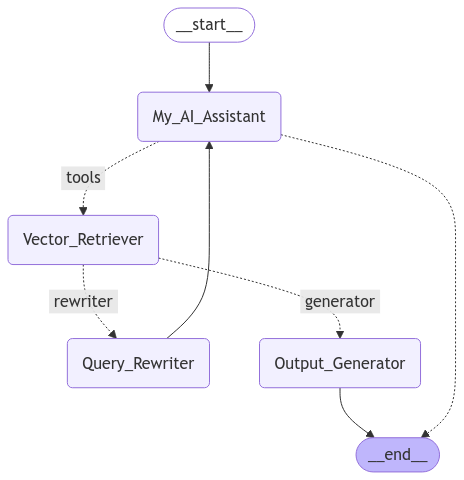

In [147]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [148]:
#app.invoke("what is agenticAI?")

In [149]:
#app.invoke({"messages":["what is AgenticAI?"]})

In [150]:
app.invoke({"messages":["what is AgenticAI?"]})

**** CALL AGENT ****
message from the grader: [HumanMessage(content='what is AgenticAI?', additional_kwargs={}, response_metadata={}, id='e796ee83-5b98-4d23-8d97-6d8918dbbb3a'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cpy7', 'function': {'arguments': '{"query":"what is AgenticAI"}', 'name': 'retriever tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 963, 'total_tokens': 1049, 'completion_time': 0.156363636, 'prompt_time': 0.034360217, 'queue_time': 0.021526233, 'total_time': 0.190723853}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ac6b5712-c82a-49f4-a9dc-0d522f76e836-0', tool_calls=[{'name': 'retriever tool', 'args': {'query': 'what is AgenticAI'}, 'id': 'call_cpy7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 963, 'output_tokens': 86, 'total_tokens': 1049}), ToolMessage(content='viewpoint and I think Andr

c:\Users\Toshiba\anaconda3\envs\langgraph\lib\site-packages\langsmith\client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


this is my response:content='AgenticAI refers to AI systems with varying degrees of autonomy. \n\nThe more an AI decides how to act and achieve goals, the more "agentic" it is. \n\nThis concept is similar to levels of autonomy in self-driving cars. \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 461, 'total_tokens': 517, 'completion_time': 0.101818182, 'prompt_time': 0.014722236, 'queue_time': 0.02248551, 'total_time': 0.116540418}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-b4d08a60-f1c1-48eb-8eae-f090040ccc1c-0' usage_metadata={'input_tokens': 461, 'output_tokens': 56, 'total_tokens': 517}


{'messages': [HumanMessage(content='what is AgenticAI?', additional_kwargs={}, response_metadata={}, id='e796ee83-5b98-4d23-8d97-6d8918dbbb3a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cpy7', 'function': {'arguments': '{"query":"what is AgenticAI"}', 'name': 'retriever tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 963, 'total_tokens': 1049, 'completion_time': 0.156363636, 'prompt_time': 0.034360217, 'queue_time': 0.021526233, 'total_time': 0.190723853}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ac6b5712-c82a-49f4-a9dc-0d522f76e836-0', tool_calls=[{'name': 'retriever tool', 'args': {'query': 'what is AgenticAI'}, 'id': 'call_cpy7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 963, 'output_tokens': 86, 'total_tokens': 1049}),
  ToolMessage(content='viewpoint and I think Andrew expressed it nicely. In th

In [151]:
app.invoke({"messages":["what is an agent?"]})

**** CALL AGENT ****
message from the grader: [HumanMessage(content='what is an agent?', additional_kwargs={}, response_metadata={}, id='08abbe70-de08-4797-b5f0-f388ee52afbc'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_k04a', 'function': {'arguments': '{"query":"What is an agent?"}', 'name': 'retriever tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 962, 'total_tokens': 1047, 'completion_time': 0.154545455, 'prompt_time': 0.039753083, 'queue_time': 0.06941748, 'total_time': 0.194298538}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6c653ed0-97ce-4628-b8f5-5b051a179e09-0', tool_calls=[{'name': 'retriever tool', 'args': {'query': 'What is an agent?'}, 'id': 'call_k04a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 962, 'output_tokens': 85, 'total_tokens': 1047}), ToolMessage(content='“What is an agent?”I get ask

c:\Users\Toshiba\anaconda3\envs\langgraph\lib\site-packages\langsmith\client.py:256: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


this is my response:content='An AI agent is a system that  acts as a reasoning engine and interacts with external sources of data and computation.  It\'s more technical than most definitions, but captures the essence of an agent\'s capabilities.  Ultimately, being "agentic" means the LLM has a high level of autonomy in deciding how to act.  \n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 455, 'total_tokens': 527, 'completion_time': 0.130909091, 'prompt_time': 0.01796977, 'queue_time': 0.021532850000000003, 'total_time': 0.148878861}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-ab998883-197a-458b-b4e4-5499f3dd5f86-0' usage_metadata={'input_tokens': 455, 'output_tokens': 72, 'total_tokens': 527}


{'messages': [HumanMessage(content='what is an agent?', additional_kwargs={}, response_metadata={}, id='08abbe70-de08-4797-b5f0-f388ee52afbc'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_k04a', 'function': {'arguments': '{"query":"What is an agent?"}', 'name': 'retriever tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 85, 'prompt_tokens': 962, 'total_tokens': 1047, 'completion_time': 0.154545455, 'prompt_time': 0.039753083, 'queue_time': 0.06941748, 'total_time': 0.194298538}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6c653ed0-97ce-4628-b8f5-5b051a179e09-0', tool_calls=[{'name': 'retriever tool', 'args': {'query': 'What is an agent?'}, 'id': 'call_k04a', 'type': 'tool_call'}], usage_metadata={'input_tokens': 962, 'output_tokens': 85, 'total_tokens': 1047}),
  ToolMessage(content='“What is an agent?”I get asked this question almost daily

In [152]:
#Let's ask some irrelavant question
app.invoke({"messages":["what is ISRO?"]})

**** CALL AGENT ****
message from the grader: [HumanMessage(content='what is ISRO?', additional_kwargs={}, response_metadata={}, id='eaedb8ed-2ce3-41e3-a410-e2cd86f51fd8'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ag7s', 'function': {'arguments': '{"query":"What is ISRO?"}', 'name': 'retriever tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 962, 'total_tokens': 1045, 'completion_time': 0.150909091, 'prompt_time': 0.030844282, 'queue_time': 0.021862305, 'total_time': 0.181753373}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d4839549-2474-41a1-9bca-9fb29f55d3a9-0', tool_calls=[{'name': 'retriever tool', 'args': {'query': 'What is ISRO?'}, 'id': 'call_ag7s', 'type': 'tool_call'}], usage_metadata={'input_tokens': 962, 'output_tokens': 83, 'total_tokens': 1045}), ToolMessage(content='systems.Why is “agentic” a helpful conc

{'messages': [HumanMessage(content='what is ISRO?', additional_kwargs={}, response_metadata={}, id='eaedb8ed-2ce3-41e3-a410-e2cd86f51fd8'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ag7s', 'function': {'arguments': '{"query":"What is ISRO?"}', 'name': 'retriever tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 962, 'total_tokens': 1045, 'completion_time': 0.150909091, 'prompt_time': 0.030844282, 'queue_time': 0.021862305, 'total_time': 0.181753373}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d4839549-2474-41a1-9bca-9fb29f55d3a9-0', tool_calls=[{'name': 'retriever tool', 'args': {'query': 'What is ISRO?'}, 'id': 'call_ag7s', 'type': 'tool_call'}], usage_metadata={'input_tokens': 962, 'output_tokens': 83, 'total_tokens': 1045}),
  ToolMessage(content='systems.Why is “agentic” a helpful concept?As with all concepts, it’